**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - EDA Checkpoint

# Names

- Marina Hu
- Allison Huang
- Samuel Lee
- Audrey Liang
- Lilian Xia 

# Research Question

We want to figure out the following question for this project: 

- Are we able to predict the rise or fall of crime rates based on the rise or fall of COVID-19 rates and effects?

To do so, here are some of the variables we will be looking at (These are all on a county by county basis in California):
- Violent crime rates from around the years March 2020- March 2022
- Hospitalization rates
- Vaccination Rates
- COVID cases

## Background and Prior Work

The COVID-19 pandemic has had numerous effects in many aspects of life, from social connections to physical and mental health. Among its less apparent interpersonal and political impacts are those on crime rates. Existing research and analyses reveal a comprehensive picture: while the pandemic has led to substantial shifts in crime rates compared to pre-pandemic times, the direction and scale of these changes vary depending on the type of crime. Our research aims to investigate these dynamics, particularly focusing on the trends in violent crime rates in correlation with various COVID-19 data in California. 

The Centers for Disease Control and Prevention (CDC) and FBI both reported a striking 30 percent increase in the number of homicides in the U.S. from 2019 to 2020, marking the largest single-year increase on record.<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) According to a study by the Council on Criminal Justice (CCJ), this surge likely stemmed from a combination of factors, including the pandemic and social unrest.<a name="cite_ref-3"></a>[<sup>3</sup>](#cite_note-3) This study also highlights increases in aggravated and gun assaults and motor vehicle thefts, juxtaposed with declines in residential and non-residential burglaries, larcenies, and drug offenses. Recent data reveals that there was a significant 2% decline in violent crime in the U.S., approaching pre-pandemic rates.<a name="cite_ref-4"></a>[<sup>4</sup>](#cite_note-4) However, these studies note that it is unclear if these fluctuations in crime rate can be attributed to the pandemic. In our project, we aim to analyze COVID-19 data to see if there are significant correlations that can potentially help explain and predict these trends.

More specifically, we focus on analyzing data in California as findings reveal a notable widening of the gap between the state’s violent crime rates and the national average during the pandemic.<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) This disparity increased significantly from 15% in 2019 to 31% in 2022. Surprisingly, this surge is not correlated with the national increase in homicide rates but rather due to a rise in aggravated assaults within the state. Moreover, the Public Policy Institute of California indicates that the violent crime rates across counties varies, with 36 out of 58 witnessing a surge in 2022, 13 of which increasing by 20% or more. With this research, we’re interested in further analyzing violent crime rates in California to identify potential correlations with COVID-19. Are the shifts in crime rate truly attributed to the pandemic or merely an overlap in timing? Moreover, are these correlations consistent across the state or confined to specific counties? To answer these questions, we look at three major indicators of COVID-19: hospitalization rates, overall cases, and vaccination rates. Going a step further, we want to see if we can potentially predict the rise or fall of violent crime rates given the upward or downward trends of the pandemic.

1. <a name="cite_note-1"></a> Lofstrom, M., & Martin, B. (2023, October). Crime Trends in California. Public Policy Institute of California. https://www.ppic.org/publication/crime-trends-in-california/ 
2. <a name="cite_note-2"></a> Northeastern University Public Affairs. (2023, January 27). How COVID-19 Changed Crime in the U.S.. https://publicaffairs.northeastern.edu/articles/us-crime-rate-during-pandemic/ 
3. <a name="cite_note-3"></a> Rosenfeld, R., & Lopez Jr., E. (2021, May 21). Pandemic, Social Unrest, And Crime in U.S. Cities: March 2021 Update. Council on Criminal Justice. https://counciloncj.org/impact-report-covid-19-and-crime/ 
4. <a name="cite_note-4"></a> Salter, J. (2023, October). Violent Crime Decreases to Pre-Pandemic Levels: FBI Report. TIME USA. https://time.com/6324381/violent-crime-decreases-pre-pandemic-levels-fbi/ 


# Hypothesis



We hypothesize that COVID-19's effect on the public's health will be reflected in the violent crime rates. We believe there is a relationship between counties more heavily impacted by COVID-19 and rising serious crime rates. 

# Data

## Data overview

For each dataset include the following information
- Dataset #1
  - Dataset Name: California Crime Rates by County
  - Link to the dataset: https://openjustice.doj.ca.gov/data, under Crime and Clearances Monthly CSV
  - Number of observations: 350
  - Number of variables: 12
- Dataset #2 
  - Dataset Name: COVID-19 Time-Series Metrics by County and State
  - Link to the dataset: https://catalog.data.gov/dataset/covid-19-time-series-metrics-by-county-and-state-e7757
  - Number of observations: 86559
  - Number of variables: 12
- Dataset #3 
  - Dataset Name: Statewide Covid-19 Hospital County Data
  - Link to the dataset: https://data.ca.gov/dataset/covid-19-hospital-data/resource/e34f966b-39dc-4f86-8087-2f9b327f60f3
  - Number of observations: 79554
  - Number of variables: 10
- Dataset #4
  - Dataset Name: Covid-19 Vaccines Counts by County
  - Link to the dataset: https://data.ca.gov/dataset/covid-19-vaccine-progress-dashboard-data/resource/317f8cd8-7225-4b7e-99d1-6ea441043a51
  - Number of observations: 9195
  - Number of variables: 10 

## Dataset #1: California Crime Rates by County

In [1]:
# import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# setting
pd.options.display.max_rows = 30
pd.options.display.max_columns = 20

In [2]:
counties = ['Los Angeles County' , 'San Diego County' , 'Orange County' , 'Riverside County' , 'San Bernardino County' , 'Santa Clara County', 'Alameda County', 'Sacramento County', 'Contra Costa County', 'Fresno County', 'Kern County', 'Ventura County',  'San Joaquin County', 'San Francisco County', 'San Mateo County']
obj_cols = ['Violent_sum','Homicide_sum','ForRape_sum','Robbery_sum','AggAssault_sum','Property_sum','Burglary_sum','VehicleTheft_sum','LTtotal_sum']
crime_df = pd.read_csv('CrimeData.csv', low_memory= False)

#Replacing all empty strings with 0 to get rid of converting empty strings to ints
crime_df[obj_cols] = crime_df[obj_cols].replace(" ", '0').astype(int)

crime_df = crime_df[crime_df['County'].isin(counties)].drop('NCICCode', axis=1)
crime_df['County'] = crime_df['County'].str.replace(' County', '')

#Locate just years 2020-2022 and just from March 2020 - March 2022
crime_df = crime_df[crime_df['Year'] > 2019].iloc[2:14599,:8]
crime_df['year_month'] = crime_df['Year'].astype(str) + '-' + crime_df['Month'].astype(str).apply(lambda x: x.zfill(2))
crime_df = crime_df[crime_df['year_month'].between('2020-07', '2022-03')]
crime_df = crime_df.drop(['Month', 'Year'], axis= 1)

# Sum up from each individual city
crime_df = crime_df.groupby(['County', 'year_month'], group_keys= True).sum().reset_index()
crime_df = crime_df.rename(columns={'County':'county'})

crime_df

,county,year_month,Violent_sum,Homicide_sum,ForRape_sum,Robbery_sum,AggAssault_sum
0,Alameda,2020-07,810,13,51,303,443
1,Alameda,2020-08,788,18,67,279,424
2,Alameda,2020-09,772,19,67,262,424
3,Alameda,2020-10,840,14,62,343,421
4,Alameda,2020-11,779,13,45,378,343
...,...,...,...,...,...,...,...
307,Ventura,2021-08,141,3,16,24,98
308,Ventura,2021-09,137,1,16,24,96
309,Ventura,2021-10,191,0,30,44,117
310,Ventura,2021-11,149,1,15,53,80


## COVID-19 Cases by County Dataset

- Description: 
    - The dataset below is from to California Department of Public Health and contains data about the number of COVID-19 cases, deaths, and positive tests across all the counties in California between 02/01/2020 to 12/19/2023. 
- Variables and their datatypes:
    - The main varibales that we are interested in analyzing are 'cumulative_cases' (`float64` type), 'cumulative_deaths' (`float64` type), 'cumulative_total_tests' (`int64` type), 'cumulative_positive_tests' (`int64` type). 'date' and 'area' are included as well which are of `object` type, and for area, which in this dataset is synonymous with county, is limited to the top 15 most populated counties in California, and this has been consistent amongst all our dataset. 'population' (also `float64` type) is kept as a potential important and useful factor for analysis in the future. 
- Concepts:
    - In general, these variables reveal the total most updated number of cases, deaths, total tests, and positive tests in these counties on each date of 02/01/2020 to 12/19/2023. This will help us further determine further if a county was more affected by COVID-19 than other counties, along with our other factors too for the COVID-19 part of our research question
- Wrangling/Cleaning/Preprocessing the dataset:
    - To begin our initial wrangling, we plan to first just pull out all the data for our variables, counties, and dates of interest (as shown below) and thus condensing the dataset down to 11415 rows × 7 columns. Because we have multiple datasets for COVID-19, we plan to do the same process for all the COVID-19 dataset, eventually combining all these into one dataframe to simplify and increase the efficiency of future analysis.

In [3]:
# counties and interested columns to analyze further into
counties = ['Los Angeles' , 'San Diego' , 'Orange' , 'Riverside' , 'San Bernardino' , 'Santa Clara', 'Alameda', 'Sacramento', 'Contra Costa', 'Fresno', 'Kern', 'Ventura',  'San Joaquin', 'San Francisco', 'San Mateo']
interested_cols = ['date', 'area', 'population', 'cumulative_cases', 'cumulative_deaths', 'cumulative_total_tests', 'cumulative_positive_tests']

# loading/reading the initial dataframe
covid_cases_df = pd.read_csv('COVID19_Cases_Test.csv')
covid_cases_df = covid_cases_df[covid_cases_df['area'].isin(counties)].drop('area_type', axis=1)
covid_cases_df = covid_cases_df.dropna()
covid_cases_df['date'] = pd.to_datetime(covid_cases_df['date'])
covid_cases_df = covid_cases_df[covid_cases_df['date'].between('2020-07-01', '2022-03-31')] 
covid_cases_df['year_month'] = covid_cases_df['date'].dt.year.astype(str) + '-' + covid_cases_df['date'].dt.month.astype(str).apply(lambda x: x.zfill(2))
covid_cases_df = covid_cases_df.drop(['cumulative_positive_tests', 'cumulative_cases', 'cumulative_deaths', 'cumulative_total_tests', 'date'], axis=1)

covid_cases_df = covid_cases_df.groupby(['area', 'year_month', 'population'], group_keys= True).sum().reset_index()

covid_cases_df

,area,year_month,population,cases,deaths,total_tests,positive_tests
0,Alameda,2020-07,1685886.0,6567.0,58.0,138437.0,7932.0
1,Alameda,2020-08,1685886.0,5360.0,102.0,133932.0,6646.0
2,Alameda,2020-09,1685886.0,2587.0,77.0,146775.0,3394.0
3,Alameda,2020-10,1685886.0,2635.0,30.0,194579.0,3063.0
4,Alameda,2020-11,1685886.0,8462.0,39.0,250418.0,8443.0
...,...,...,...,...,...,...,...
310,Ventura,2021-11,852747.0,2450.0,17.0,136381.0,3141.0
311,Ventura,2021-12,852747.0,16697.0,33.0,180228.0,19435.0
312,Ventura,2022-01,852747.0,48779.0,137.0,298510.0,65793.0
313,Ventura,2022-02,852747.0,5633.0,109.0,135300.0,8917.0


In [4]:
# what the datatypes are for each of the varaibles that we are interested in analyzing 
covid_cases_df.dtypes

area               object
year_month         object
population        float64
cases             float64
deaths            float64
total_tests       float64
positive_tests    float64
dtype: object

In [5]:
# size of the dataframe after filtereing for interested variables, counties, and dates
covid_cases_df.shape

(315, 7)

In [6]:
# getting an overview of and checking missingness of the dataset
covid_cases_df.isnull().sum()

area              0
year_month        0
population        0
cases             0
deaths            0
total_tests       0
positive_tests    0
dtype: int64

## COVID-19 Hospitalization by County Dataset

- Description: 
    - The dataset below is from the California Department of Public Health and contains data about hostipitalization related to COVID across all the counties in California between 2020-03-27 to 2024-02-17. 
- Variables and their datatypes:
    - **todays_date** (pd.timestamp): The date of the observation
    - **hospitalized_covid_confirmed_patients** (float64): The number of patients hospitalized in an inpatient bed who have laboratory-confirmed COVID.
    - **hospitalized_suspected_covid_patients** (float64): The number of patients hospitalized in an inpatient bed without a laboratory-confirmed COVID diagnosis who have signs and symptoms compatible with COVID.
    - **hospitalized_covid_patients** (float64): The number of patients currently hospitalized in an inpatient bed who have suspected or confirmed COVID.
    - **all_hospital_beds** (float64): The total number of beds in the facility, including all surge beds, inpatient and outpatient post-surgical beds, labor and delivery unit beds, and observation beds.
    - **icu_covid_confirmed_patients** (float64): The number of laboratory-confirmed positive COVID patients that are in the ICU at the hospital.
    - **icu_suspected_covid_patients** (float64): The number of symptomatic patients, with tests for COVID pending laboratory confirmation, that are in the ICU at the hospital.
    - **icu_available_beds** (float64): The number of ICU beds available at the hospital.
- Concepts:
    - This dataset can give us the general condition of COVID hospitalization, which can help us to estimate the impact of COVID on medical capacity.
- Wrangling/Cleaning/Preprocessing the dataset:
    - We first removed "_id" column because it is the same as the index, and then we converted "todays_date" into pd.Timestamp datatype for us to select the time range we want. Then, we keeped the data in the top 15 populated counties.

In [7]:
hospital_df = pd.read_csv('covid19_hospitalization.csv')

# drop id column
hospital_df = hospital_df.drop('_id', axis=1)

# change the date column to pd.datetime
hospital_df["todays_date"] = pd.to_datetime(hospital_df["todays_date"])

# select rows between march 2020 and march 2022
hospital_df = hospital_df[hospital_df['todays_date'].between('2020-07-01', '2022-03-31')]

# select rows with the following counties
counties_2 = [county.replace(" County", "") for county in counties]
hospital_df = hospital_df[hospital_df['county'].isin(counties_2)].reset_index(drop=True)

hospital_df = hospital_df[['county', 'todays_date', 'hospitalized_covid_patients', 'all_hospital_beds', 'icu_covid_confirmed_patients', 'icu_available_beds']]
hospital_df['year_month'] = hospital_df['todays_date'].dt.to_period('M').astype(str)
hospital_df = hospital_df.drop(['todays_date'], axis=1).groupby(['county', 'year_month']).sum().round(2).reset_index()

hospital_df.head()

,county,year_month,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_available_beds
0,Alameda,2020-07,6742.0,84000.0,1631.0,3701.0
1,Alameda,2020-08,7234.0,74264.0,1874.0,2764.0
2,Alameda,2020-09,4667.0,71856.0,1046.0,3348.0
3,Alameda,2020-10,3150.0,74370.0,599.0,3701.0
4,Alameda,2020-11,4137.0,74421.0,769.0,3139.0


In [8]:
# Proportion of missingness in each column
hospital_df.isnull().sum() / len(hospital_df)

county                          0.0
year_month                      0.0
hospitalized_covid_patients     0.0
all_hospital_beds               0.0
icu_covid_confirmed_patients    0.0
icu_available_beds              0.0
dtype: float64

## Dataset #4 Covid-19 Vaccines Counts by County

In [9]:
vaccine_df = pd.read_csv('covid19vaccinesbycounty.csv')

# top 15 counties in CA by population
counties = ['Los Angeles' , 'San Diego' , 'Orange' , 'Riverside' , 'San Bernardino' , 'Santa Clara', 'Alameda', 'Sacramento', 'Contra Costa', 'Fresno', 'Kern', 'Ventura',  'San Joaquin', 'San Francisco', 'San Mateo']

# inclule only the 15 counties in df
vaccine_df = vaccine_df[vaccine_df['county'].isin(counties)]
vaccine_df['administered_date'] = pd.to_datetime(vaccine_df['administered_date'])

# include the administered_date from March 2020 - March 2022
vaccine_df = vaccine_df[vaccine_df['administered_date'].between('2020-07-01', '2022-03-31')].reset_index(drop=True)

# only keeping the informative columns 
vaccine_df = vaccine_df[['county', 'administered_date', 'fully_vaccinated', 'cumulative_fully_vaccinated']]

# split the adminstered_date into year and month for merging the data later on
vaccine_df['year_month'] = vaccine_df['administered_date'].dt.to_period('M').astype(str)

# rearrange the information
vaccine_df = vaccine_df.groupby(['county', 'year_month']).agg({"fully_vaccinated": "sum", "cumulative_fully_vaccinated":"last"}).reset_index()
vaccine_df

,county,year_month,fully_vaccinated,cumulative_fully_vaccinated
0,Alameda,2020-07,0,0
1,Alameda,2020-08,2,2
2,Alameda,2020-09,38,40
3,Alameda,2020-10,6,46
4,Alameda,2020-11,6,52
...,...,...,...,...
310,Ventura,2021-11,12315,566698
311,Ventura,2021-12,18248,584946
312,Ventura,2022-01,12934,597880
313,Ventura,2022-02,9360,607240


### Merge all datasets into one:

In [10]:
data = pd.merge(covid_cases_df, hospital_df, how='inner', left_on=['area', 'year_month'], right_on=['county', 'year_month'])
data = pd.merge(data, vaccine_df, how='inner', left_on=['area', 'year_month'], right_on=['county', 'year_month'])
data = pd.merge(data, crime_df, how='inner', left_on=['area', 'year_month'], right_on=['county', 'year_month'])
data = data.drop(['county_x', 'county_y', 'county'], axis=1)
data = data.rename(columns={'area':'county'})
data

,county,year_month,population,cases,deaths,total_tests,positive_tests,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_available_beds,fully_vaccinated,cumulative_fully_vaccinated,Violent_sum,Homicide_sum,ForRape_sum,Robbery_sum,AggAssault_sum
0,Alameda,2020-07,1685886.0,6567.0,58.0,138437.0,7932.0,6742.0,84000.0,1631.0,3701.0,0,0,810,13,51,303,443
1,Alameda,2020-08,1685886.0,5360.0,102.0,133932.0,6646.0,7234.0,74264.0,1874.0,2764.0,2,2,788,18,67,279,424
2,Alameda,2020-09,1685886.0,2587.0,77.0,146775.0,3394.0,4667.0,71856.0,1046.0,3348.0,38,40,772,19,67,262,424
3,Alameda,2020-10,1685886.0,2635.0,30.0,194579.0,3063.0,3150.0,74370.0,599.0,3701.0,6,46,840,14,62,343,421
4,Alameda,2020-11,1685886.0,8462.0,39.0,250418.0,8443.0,4137.0,74421.0,769.0,3139.0,6,52,779,13,45,378,343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,Ventura,2021-08,852747.0,6573.0,56.0,127610.0,8086.0,4001.0,36063.0,870.0,1102.0,23104,517150,141,3,16,24,98
308,Ventura,2021-09,852747.0,4015.0,56.0,161462.0,5306.0,3433.0,35261.0,870.0,905.0,22922,540072,137,1,16,24,96
309,Ventura,2021-10,852747.0,2463.0,16.0,145672.0,3158.0,1780.0,35778.0,372.0,1015.0,14311,554383,191,0,30,44,117
310,Ventura,2021-11,852747.0,2450.0,17.0,136381.0,3141.0,1282.0,35038.0,210.0,1013.0,12315,566698,149,1,15,53,80


# Results

## Exploratory Data Analysis

Carry out whatever EDA you need to for your project.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

### Section 1 of EDA - please give it a better title than this

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

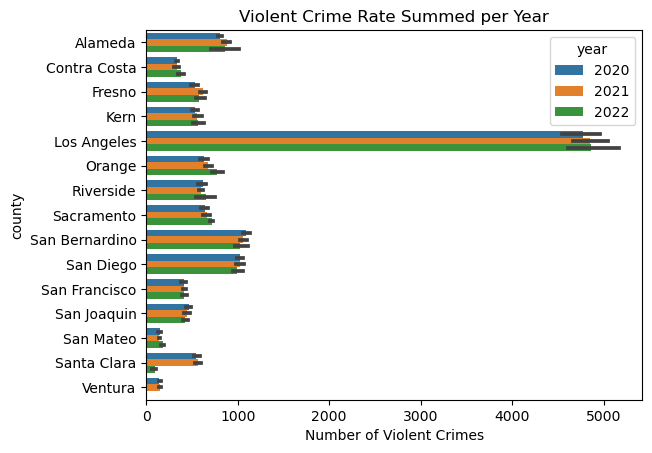

In [14]:
crime_df['year'] = crime_df['year_month'].str.split('-').str[0]

sns.barplot(y = 'county', x = 'Violent_sum', hue = 'year', data = crime_df)
plt.title('Violent Crime Rate Summed per Year')
plt.xlabel('Number of Violent Crimes')
plt.show()

### Section 2 of EDA if you need it  - please give it a better title than this

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

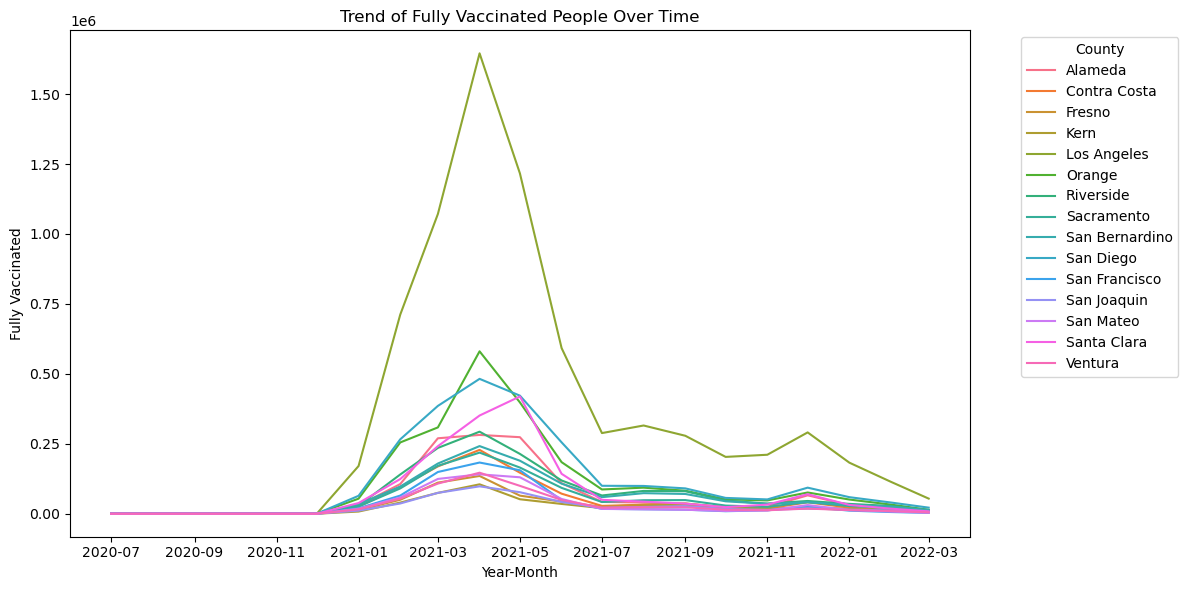

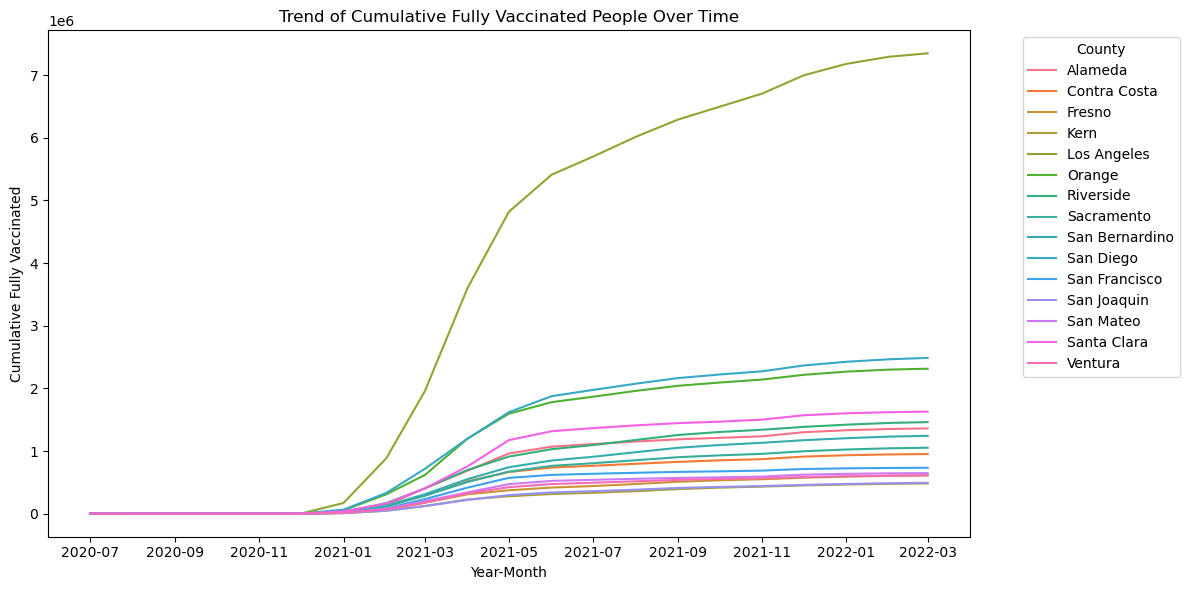

In [18]:
# convert object to number 
vaccine_df['fully_vaccinated'] = pd.to_numeric(vaccine_df['fully_vaccinated'])
vaccine_df['year'] = pd.to_numeric(vaccine_df['year_month'].str.split('-').str[0])
vaccine_df['month'] = pd.to_numeric(vaccine_df['year_month'].str.split('-').str[1])

# Create line plot to observe the trend
plt.figure(figsize=(12, 6))
vaccine_df['date'] = pd.to_datetime(vaccine_df[['year', 'month']].assign(day=1))
sns.lineplot(x='date', y='fully_vaccinated', hue='county', data=vaccine_df)

plt.title('Trend of Fully Vaccinated People Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Fully Vaccinated')
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# plot for cumulative_fully_vaccinated
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='cumulative_fully_vaccinated', hue='county', data=vaccine_df)

plt.title('Trend of Cumulative Fully Vaccinated People Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Cumulative Fully Vaccinated')
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## EDA #3

From the graph below we can see that regardless of the counties, the graph follows a similar trend

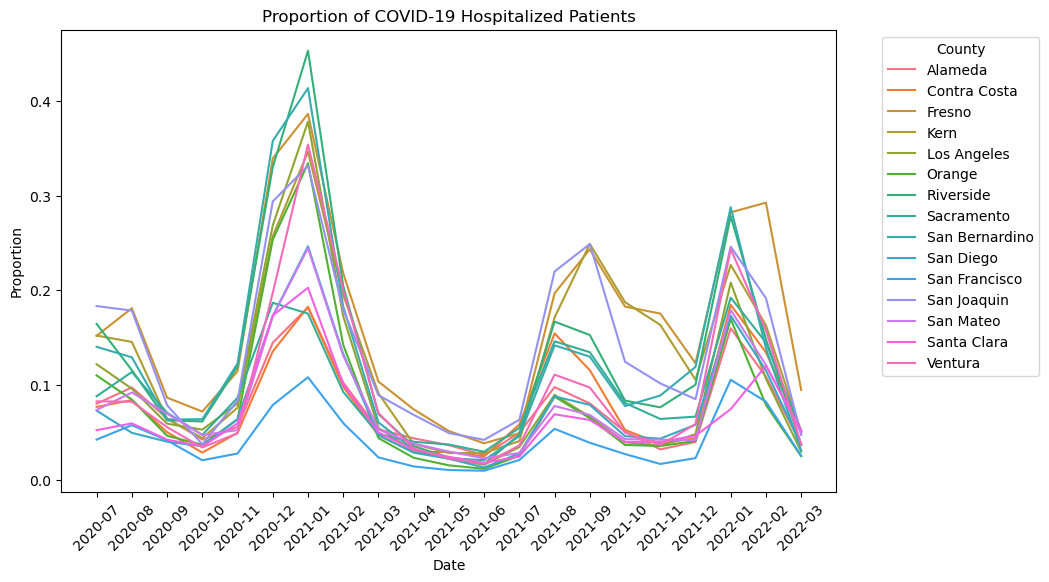

In [22]:
# Calculate the proportion
hospital_df['proportion'] = hospital_df['hospitalized_covid_patients'] / hospital_df['all_hospital_beds']
hospital_df['proportion'] = hospital_df['proportion'].apply(lambda x: x if x <= 1 else np.nan)
# Plot the proportion
plt.figure(figsize=(10, 6))
sns.lineplot(data=hospital_df, x='year_month', y='proportion', hue='county')
plt.title('Proportion of COVID-19 Hospitalized Patients')
plt.xlabel('Date')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## EDA #4

In [109]:
sorted_date_cases = covid_cases_df.sort_values(by='date').reset_index(drop=True)
sorted_date_cases

sorted_date_cases['year_month'] = pd.to_datetime(sorted_date_cases['date']).dt.to_period('M')
# sorted_date_cases
sorted_date_cases

KeyError: 'date'

In [ ]:
# Convert 'date' column to datetime if it's not already
covid_cases_df['date'] = pd.to_datetime(covid_cases_df['date'])

# Set the date column as the index
covid_cases_df.set_index('date', inplace=True)

monthly_average_df = covid_cases_df.groupby('area').resample('M').mean()
monthly_average_df

# Reset the index to have 'county' and 'date' as columns again
monthly_average_df.reset_index(inplace=True)

# Format the datetime index to display only the year and month
monthly_average_df['date'] = monthly_average_df['date'].dt.strftime('%Y-%m')

# 25 months in our dataset, plus 15 counties --> expect 375 rows
monthly_average_df

In [ ]:
var_columns = ['cumulative_cases', 'cumulative_deaths',
       'cumulative_total_tests', 'cumulative_positive_tests']

for col in var_columns:
    proportion = monthly_average_df[col]/monthly_average_df['population']
    
    # Determine the position to insert the new column
    existing_column_position = monthly_average_df.columns.get_loc(col)  # Get the position of 'existing_column'

    # Insert the new column after 'existing_column'
    monthly_average_df.insert(existing_column_position + 1, ('proportion of ' + col), proportion)
    

monthly_average_df 

In [ ]:
plt.figure(figsize=(20, 10))

sns.barplot(x = 'date', y = 'proportion of cumulative_cases', hue = 'area', data = monthly_average_df, palette = 'Blues')
plt.xticks(rotation=90)

plt.show()

In [ ]:
# most populated counties in california (source: https://www.california-demographics.com/counties_by_population)
#
# 1	Los Angeles County	9,936,690
# 2	San Diego County	3,289,701
# 3	Orange County	3,175,227
# 4	Riverside County	2,429,487
# 5	San Bernardino County	2,180,563


plt.figure(figsize=(30, 20))

# Pivot the DataFrame to create a matrix suitable for a heatmap
heatmap_data = monthly_average_df.pivot(index='area', columns='date', values='proportion of cumulative_cases')

# Plot the heatmap
sns.heatmap(data=heatmap_data, cmap='viridis', annot=True)  # You can choose a different colormap

# Show the plot
plt.show()

In [ ]:
# Sort the DataFrame by date and proportion of cumulative cases
sorted_df = monthly_average_df.sort_values(by=['date', 'proportion of cumulative_cases'], ascending=[True, False])

# Add a new column 'county_rank' representing the ranking of counties for each month
sorted_df['county_rank'] = sorted_df.groupby('date').cumcount() + 1

# Print or use the resulting DataFrame (sorted_df)
sorted_df[['date', 'area', 'proportion of cumulative_cases', 'county_rank']].tail(15)

# Ethics & Privacy

In regards to potential ethical concerns of this project, there may be various biases depending on the specific dataset used. For crime data, it is likely that datasets are not reflective of all the crimes committed in a specific county but rather only those reported by the police. When conducting our analyses, we need to be aware of this potential collection bias as certain crimes may be underreported or overreported due to factors like law enforcement, community awareness campaigns, recent events, etc. Additionally, we need to consider many potential confounding variables in our analysis; for example, crime rates can vary based on geographical and demographic factors like population density, socioeconomic status, and cultural influences. Any correlations or associations found from our analyses may be due to a range of factors that may not be directly identified through our datasets. Similarly, for COVID-19 data, it is likely that datasets are subject to testing and reporting biases that are influenced by the availability and accessibility to testing resources and healthcare facilities in certain regions and populations. Differences in case definitions, data collection methods, and reporting protocols may create variations in the data cross regions. Confounding variables like asymptomatic cases, pre-existing health conditions, and public health interventions can also skew the measures of the “impact” of COVID-19. Keeping these considerations in mind, we can closely review how data was collected to see if certain groups were potentially overrepresented or underrepresented in the dataset. We can also look for any inconsistencies, missing values, or data entry errors that potentially affect the integrity of the dataset and consider whether this is due to any systematic biases in data collection practices. Statistical techniques can also be used to detect patterns, outliers, and anomalies in the data and help control for confounding variables. Lastly, we can compare and cross-reference multiple datasets from different sources to validate our findings and identify potential biases.

In general, in regards to privacy, no Personal Identifiable Information is being used because the data collected are more generalized by region. We should also keep in consideration that many crime and COVID-19 datasets are collected and maintained by law enforcement agencies or the government and therefore may be subject to terms of use agreements, restricting how data can be accessed or shared. Another general issue with this topic is data transparency as we want to ensure that findings in this research study avoid selective reporting or manipulation of data to fit a particular narrative. To address this, we should work to address any potential blindspots and work to mitigate any dataset bias such as stereotype perpetuation and confirmation bias. Another issue to consider is fairness and equity as a potential concern is that analyzing crime data in correlation with COVID-19 impact may reveal disparities in the distribution of resources, access to healthcare, and exposure to risk factors across marginalized populations. In our analysis, we should consider potential unintended consequences and prevent data from being misinterpreted or used to justify any discriminatory practices or policies.

# Team Expectations 


* *Team Expectation 1: Communication*
    - Please make sure to tell the group if you can't finish your work by the deadline, or if any problems come up. If you can't make a meeting, be sure to let everybody know in the group discord. 
* *Team Expectation 2: Work Style*
    - The team will have designated work during the meetings before the due dates and will try to follow the project timeline as best as possible to ensure that we are all caught up on work. 
* *Team Expecation 3: Conflict Resolution*
    - If any problems arise, the team will either bring it up at the weekly Wednesday meeting or bring it up in the general discord channel. 


# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 2/7  |  5 PM | Read & Think about COGS 108 expectations; brainstorm topics/questions  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research | 
| 2/14  |  5 PM |  Find Datasets  | Discuss datasets, start cleaning and wrangling | 
| 2/21  | 5 PM  | Continue cleaning and wrangling, revise background and hypothesis  | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 2/28  | 5 PM  | Import & Wrangle Data; Start EDA | Combine relevant datasets; Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 3/6  | 5 PM  | Finalize wrangling/EDA; Begin Analysis | Discuss/edit Analysis; Complete project check-in, Final Video  |
| 3/13  | 5 PM  | Complete analysis; Draft results/conclusion/discussion| Discuss/edit full project, Final video |
| 3/20  | Before 11:59 PM  | Complete all individual and collective parts of the project | Turn in Final Project & Group Project Surveys |